# Première étude des dataset


### *Importation des 4 fichiers csv*

In [1]:
indicators<-read.csv2("Indicators.csv", dec=".", sep=";", header=T)
economicinfo<-read.csv2("economic_info.csv", dec=".", sep=";", header=T)
datacrop<-read.csv2("MAELIA_crop_raw.csv", dec=".", sep=";", header=T)
datalivestock<-read.csv2("MAELIA_livestock_raw.csv", dec=".", sep=";", header=T)

*On renomme les colonnes pour faciliter la manipulation :*

In [2]:
date <- c("2005","2006","2007","2008","2009","2010","2011","2012","2013","2014","2015","2016","2017")
names(indicators) <- c("Scenario", "Level", "Indicator", date)
names(economicinfo) <- c("Group", "Variable", date)
names(datacrop) <- c("Scenario", "Year", "Farm", "Parcel", "Crop", "Yield", "Area", "Revenue", "Variablecost", "Energy", "ProteinkgN", "PDIN", "ProteinN.ton", "Nitrogen", "Phosphorus", "Potassium", "Active ingredient")
names(datalivestock) <- c("Scenario", "Year", "Farm", "Milk revenue", "Feed cost")

*On réalise un premier résumé des 4 fichiers :*

In [ ]:
summary(indicators)
summary(economicinfo)
summary(datacrop)
summary(datalivestock)

### *Fonction de choix d'un scénario, d'un niveau d'étude, d'une culture, et d'un indicateur*

*Cette fonction utilise le fichier d'output MAELIA_crop.*  
*Elle prend en argument un scénario, un niveau d'étude, une culture et un indicateur et sort un sous dataset du fichier d'origine comprenant les colonnes et les lignes choisies.*  
  
**WARNING** : bien respecter l'orthographe, les majuscules et les guillemets.    
Les différents arguments possibles sont : 
* scenario : "Baseline situation" ; "Coexistence scenario" ; "Complementarity scenario" ; "Synergetic scenario"
* level : "arable" ; "livestock" ; "territory" ; "AF1" ; "AF2" ; ... ; "AF5" ; "LF1" ; "LF2"
* culture : "BarleyS" ; "BarleyW" ; "Buckwheat" ; "FavaB" ; "Flax" ; "Fodder" ; "gMaize" ; "Gpea" ; "Hay" ; "Hemp" ; "Lucern" ; "Lupin" ; "Mix_CerG" ; "OSR" ; "sMaize" ; "Tritic" ; "WheatW"
* indicateur : "Yield" ; "Area" ; "Revenue" ; "Variablecost" ; "Energy" ; "ProteinkgN" ; "PDIN" ; "ProteinN.ton" ; "Nitrogen" ; "Phosphorus" ; "Potassium" ; "Active ingredient"


In [8]:
dataset <- function(scenario, level, culture, indicateur) {
  if (level == "arable"){
      subset1 <- subset(datacrop, Scenario == scenario)
      subset2 <- subset(subset1, Farm == "AF1" | Farm == "AF2" | Farm == "AF3" | Farm == "AF4" | Farm =="AF5")
      subset3 <- subset(subset2, Crop == culture)
      subset4 <- subset(subset3, select = c("Scenario", "Year", "Farm", "Parcel", "Crop", indicateur))
  }else if (level == "livestock"){
      subset1 <- subset(datacrop, Scenario == scenario)
      subset2 <- subset(subset1, Farm == "LF1" | Farm == "LF2")
      subset3 <- subset(subset2, Crop == culture)
      subset4 <- subset(subset3, select = c("Scenario", "Year", "Farm", "Parcel", "Crop", indicateur))
  }else if (level == "territory"){
      subset1 <- subset(datacrop, Scenario == scenario)
      subset2 <- subset(subset1, Farm == "AF1" | Farm == "AF2" | Farm == "AF3" | Farm == "AF4" | Farm =="AF5" | Farm == "LF1" | Farm == "LF2")
      subset3 <- subset(subset2, Crop == culture)
      subset4 <- subset(subset3, select = c("Scenario", "Year", "Farm", "Parcel", "Crop", indicateur))
  }else{
      subset1 <- subset(datacrop, Scenario == scenario)
      subset2 <- subset(subset1, Farm == level)
      subset3 <- subset(subset2, Crop == culture)
      subset4 <- subset(subset3, select = c("Scenario", "Year", "Farm", "Parcel", "Crop", indicateur))
  }
  return(subset4)
}

##### *Exemple pour l'étude des rendements de la culture WheatW, pour le groupement de fermes arable, dans le scenario Baseline :*

In [6]:
exdataset <- dataset("Baseline situation", "arable", "WheatW", "Yield")
summary(exdataset)

                     Scenario        Year       Farm         Parcel   
 Baseline situation      :421   Min.   :2005   AF1: 74   5011_00:  9  
 Coexistence scenario    :  0   1st Qu.:2008   AF2: 51   5011_01:  9  
 Complementarity scenario:  0   Median :2011   AF3:114   105_00 :  8  
 Synergetic scenario     :  0   Mean   :2011   AF4: 89   2021_00:  8  
                                3rd Qu.:2014   AF5: 93   5010_00:  8  
                                Max.   :2017   LF1:  0   5014_00:  8  
                                               LF2:  0   (Other):371  
        Crop         Yield      
 WheatW   :421   Min.   :4.510  
 BarleyS  :  0   1st Qu.:7.410  
 BarleyW  :  0   Median :7.490  
 Buckwheat:  0   Mean   :7.328  
 FavaB    :  0   3rd Qu.:7.500  
 Flax     :  0   Max.   :7.500  
 (Other)  :  0                  

In [7]:
summary(exdataset$Yield)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.510   7.410   7.490   7.328   7.500   7.500 

### *Fonction pour tracer l'indicateur choisi en fonction des années, pour un scénario*

*Cette fonction prend en entrée les mêmes arguments que la fonction précédente.*  
*Elle renvoie un graphique où l'indicateur choisi est tracé en fonction des années pour le scénario choisi.*  
*Si le niveau d'étude choisi est "arable", "livestock" ou "territory", les tracé pour les différentes fermes seront indiqués d'une couleur différente.*  

In [11]:
tracescenario <- function(scenario, level, culture, indicateur){
  fichier <- dataset(scenario, level, culture, indicateur)
  
  if (level == "arable"){
    
    y1 <- subset(fichier, Farm == "AF1", select = c("Year", indicateur))
    y2 <- subset(fichier, Farm == "AF2", select = c("Year", indicateur))
    y3 <- subset(fichier, Farm == "AF3", select = c("Year", indicateur))
    y4 <- subset(fichier, Farm == "AF4", select = c("Year", indicateur))
    y5 <- subset(fichier, Farm == "AF5", select = c("Year", indicateur))
    
    plot(y1$Year, y1[,2], col="red", type="l", xlab = "annees", ylab = "indicateur")
    par(new=T)
    plot(y2$Year, y2[,2], col="blue", type="l", xlab = "", ylab = "", axes = F)
    par(new=T)
    plot(y3$Year, y3[,2], col="green", type="l", xlab = "", ylab = "", axes = F)
    par(new=T)
    plot(y4$Year, y4[,2], col="yellow", type="l", xlab = "", ylab = "", axes = F)
    par(new=T)
    plot(y5$Year, y5[,2], col="purple", type="l", xlab = "", ylab = "", axes = F)
    
    legend("bottomright",legend=c("AF1","AF2", "AF3", "AF4", "AF5"),text.col=c("red","blue", "green", "yellow", "purple"))
    
    
  }else if (level == "livestock"){

    y1 <- subset(fichier, Farm == "LF1", select = c("Year", indicateur))
    y2 <- subset(fichier, Farm == "LF2", select = c("Year", indicateur))
    
    plot(y1$Year, y1[,2], col="red", type="l", xlab = "annees", ylab = "indicateur")
    par(new=T)
    plot(y2$Year, y2[,2], col="blue", type="l", xlab = "", ylab = "", axes = F)
    
    legend("bottomright",legend=c("LF1","LF2"),text.col=c("red","blue"))
    
  }else if (level == "territory"){

    
    y1 <- subset(fichier, Farm == "AF1", select = c("Year", indicateur))
    y2 <- subset(fichier, Farm == "AF2", select = c("Year", indicateur))
    y3 <- subset(fichier, Farm == "AF3", select = c("Year", indicateur))
    y4 <- subset(fichier, Farm == "AF4", select = c("Year", indicateur))
    y5 <- subset(fichier, Farm == "AF5", select = c("Year", indicateur))
    y6 <- subset(fichier, Farm == "LF1", select = c("Year", indicateur))
    y7 <- subset(fichier, Farm == "LF2", select = c("Year", indicateur))
    
    plot(y1$Year, y1[,2], col="red", type="l", xlab = "annees", ylab = "indicateur")
    par(new=T)
    plot(y2$Year, y2[,2], col="blue", type="l", xlab = "", ylab = "", axes = F)
    par(new=T)
    plot(y3$Year, y3[,2], col="green", type="l", xlab = "", ylab = "", axes = F)
    par(new=T)
    plot(y4$Year, y4[,2], col="yellow", type="l", xlab = "", ylab = "", axes = F)
    par(new=T)
    plot(y5$Year, y5[,2], col="purple", type="l", xlab = "", ylab = "", axes = F)
    par(new=T)
    plot(y6$Year, y6[,2], col="pink", type="l", xlab = "annees", ylab = indicateur)
    par(new=T)
    plot(y7$Year, y7[,2], col="grey", type="l", xlab = "", ylab = "", axes = F)
    
    legend("bottomright",legend=c("AF1","AF2", "AF3", "AF4", "AF5", "LF1", "LF2"),text.col=c("red","blue", "green", "yellow", "purple", "pink", "grey"))
    
  }else{
    
    y1 <- subset(fichier, Farm == level, select = c("Year", indicateur))
    plot(y1$Year, y1[,2], type="l", xlab = "annees", ylab = "indicateur")
    
  }
}

##### *Exemple pour l'étude des rendements de la culture WheatW, pour le groupement de fermes arable, dans le scenario Baseline :*

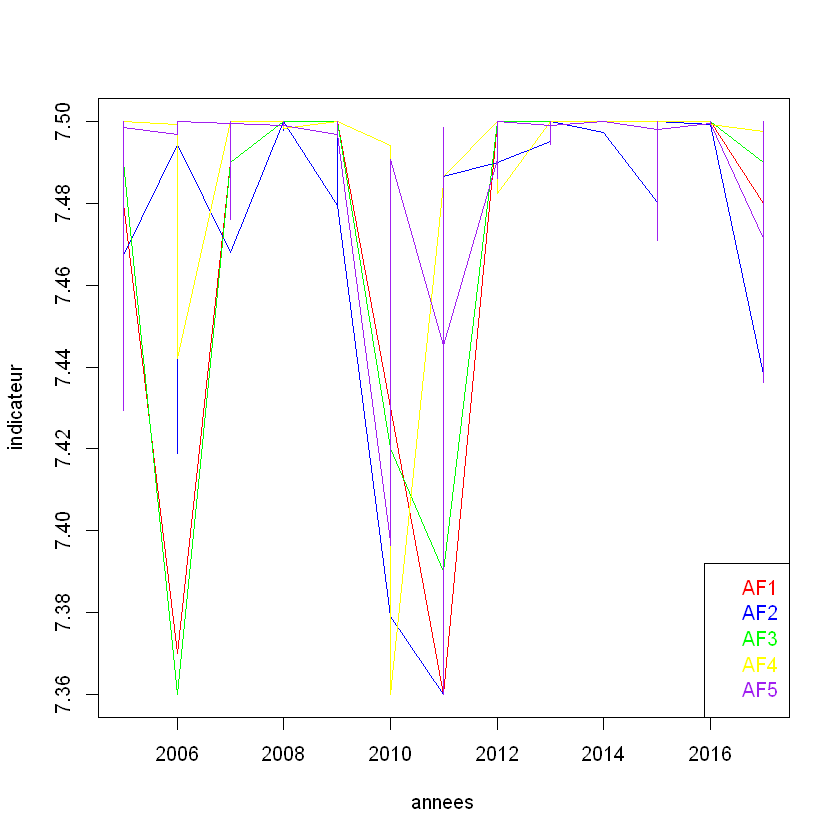

In [12]:
tracescenario("Baseline situation", "arable", "WheatW", "Yield")